## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       511 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    476
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     3.579230   11.217221   11.158982    0.068493    0.554966    6.285695   
std      8.566242   23.238233    6.816160    0.252838    0.115328    0.700434   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081005    0.000000    5.190000    0.000000    0.449000    5.887500   
50%      0.251990    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.621175   12.500000   18.100000    0.000000    0.624000    6.627000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean    68.728571    3.777940    9.475538  407.099804   18.488063  357.051272   
std     28.054200    2.100849    8.698596  168.167097    2.164489   90.925861   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.250000    2.102150    4.000000  277.000000   17.400000  375.695000   
50%     77.700000    3.132300    5.000000  330.000000   19.100000  391.700000   
75%     93.950000    5.118000   24.000000  666.000000   20.200000  396.260000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  511.000000  511.000000  
mean    12.623386   22.495499  
std      7.116341    9.167853  
min      1.730000    5.000000  
25%      6.970000   16.900000  
50%     11.320000   21.200000  
75%     16.920000   25.000000  
max     37.970000   50.000000

In [7]:
%matplotlib inline

In [8]:
# # For plotting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [9]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 408
Rows in test set: 103



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

CHAS
0    96
1     7
Name: count, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

CHAS
0    380
1     28
Name: count, dtype: int64

In [16]:
# 95/7

In [17]:
# 376/28

In [18]:
housing = strat_train_set.copy()

## Looking for Correlations

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.672506
B          0.337993
ZN         0.332727
DIS        0.235178
CHAS       0.202198
RAD       -0.350800
AGE       -0.382472
CRIM      -0.389586
NOX       -0.420815
TAX       -0.438980
INDUS     -0.448606
PTRATIO   -0.480187
LSTAT     -0.738945
Name: MEDV, dtype: float64

In [20]:
# from pandas.plotting import scatter_matrix
# attributes = ["MEDV", "RM", "ZN", "LSTAT"]
# scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

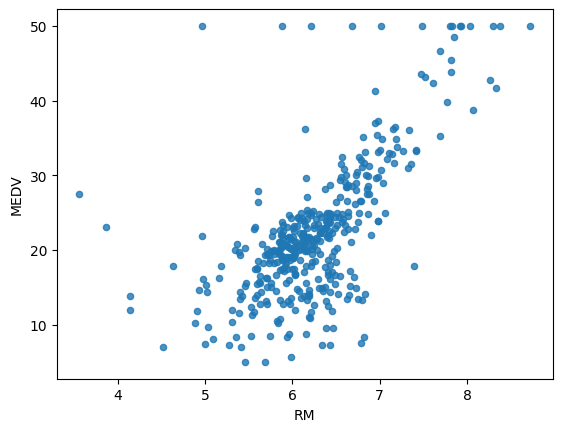

In [21]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations


In [22]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [23]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
495  0.28960   0.0   9.69     0  0.585  5.390  72.9  2.7986    6  391   
254  0.03548  80.0   3.64     0  0.392  5.876  19.1  9.2203    1  315   
365  3.69695   0.0  18.10     0  0.718  4.963  91.4  1.7523   24  666   
193  0.01439  60.0   2.93     0  0.401  6.604  18.8  6.2196    1  265   
35   0.09744   0.0   5.96     0  0.499  5.841  61.4  3.3779    5  279   

     PTRATIO       B  LSTAT  MEDV       TAXRM  
495     19.2  396.90  21.14  19.7   72.541744  
254     16.4  395.18   9.25  20.9   53.607897  
365     20.2  316.03  14.00  21.9  134.193028  
193     15.6  376.70   4.38  29.1   40.127196  
35      19.2  377.56  11.41  20.0   47.765794

In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.672506
B          0.337993
ZN         0.332727
DIS        0.235178
CHAS       0.202198
RAD       -0.350800
AGE       -0.382472
CRIM      -0.389586
NOX       -0.420815
TAX       -0.438980
INDUS     -0.448606
PTRATIO   -0.480187
TAXRM     -0.503993
LSTAT     -0.738945
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

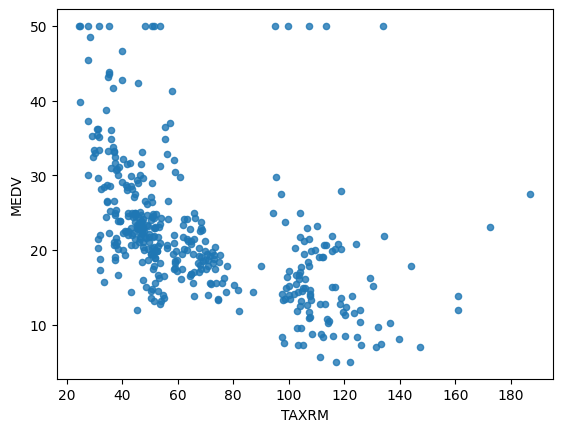

In [25]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [26]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [27]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [28]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(408, 13)

In [29]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(408, 12)

In [30]:
median = housing["RM"].median() # Compute median for Option 3

In [31]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

495    5.390
254    5.876
365    4.963
193    6.604
35     5.841
       ...  
386    5.000
243    5.593
22     5.813
480    6.750
455    5.976
Name: RM, Length: 408, dtype: float64

In [32]:
housing.shape

(408, 13)

In [33]:
housing.describe() # before we started filling missing attributes

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  408.000000  408.000000  408.000000  408.000000  408.000000  408.000000   
mean     3.622567   10.089461   11.396250    0.068627    0.557247    6.245669   
std      8.211211   21.845925    6.866829    0.253130    0.115595    0.673419   
min      0.009060    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.088282    0.000000    5.287500    0.000000    0.453000    5.876750   
50%      0.266005    0.000000    9.900000    0.000000    0.538000    6.179000   
75%      3.694070    0.000000   18.100000    0.000000    0.624000    6.593500   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  408.000000  408.000000  408.000000  408.000000  408.000000  408.000000   
mean    69.051225    3.763834    9.583333  411.276961   18.517157  353.828235   
std     28.407052    2.117100    8.717117  168.643742    2.113104   94.589005   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     45.325000    2.085850    4.000000  281.000000   17.400000  374.527500   
50%     78.400000    3.122200    5.000000  335.000000   19.100000  390.945000   
75%     94.600000    5.035675   24.000000  666.000000   20.200000  396.215000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  408.000000  
mean    12.891569  
std      7.160744  
min      1.730000  
25%      7.390000  
50%     11.645000  
75%     17.210000  
max     37.970000

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([2.66005e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.17900e+00, 7.84000e+01, 3.12220e+00, 5.00000e+00, 3.35000e+02,
       1.91000e+01, 3.90945e+02, 1.16450e+01])

In [36]:
X = imputer.transform(housing)

In [37]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [38]:
housing_tr.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  408.000000  408.000000  408.000000  408.000000  408.000000  408.000000   
mean     3.622567   10.089461   11.396250    0.068627    0.557247    6.245669   
std      8.211211   21.845925    6.866829    0.253130    0.115595    0.673419   
min      0.009060    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.088282    0.000000    5.287500    0.000000    0.453000    5.876750   
50%      0.266005    0.000000    9.900000    0.000000    0.538000    6.179000   
75%      3.694070    0.000000   18.100000    0.000000    0.624000    6.593500   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  408.000000  408.000000  408.000000  408.000000  408.000000  408.000000   
mean    69.051225    3.763834    9.583333  411.276961   18.517157  353.828235   
std     28.407052    2.117100    8.717117  168.643742    2.113104   94.589005   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     45.325000    2.085850    4.000000  281.000000   17.400000  374.527500   
50%     78.400000    3.122200    5.000000  335.000000   19.100000  390.945000   
75%     94.600000    5.035675   24.000000  666.000000   20.200000  396.215000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  408.000000  
mean    12.891569  
std      7.160744  
min      1.730000  
25%      7.390000  
50%     11.645000  
75%     17.210000  
max     37.970000

## Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr.shape

(408, 13)

## Selecting a desired model for Dragon Real Estates

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [43]:
some_data = housing.iloc[:5]

In [44]:
some_labels = housing_labels.iloc[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([19.026, 20.162, 20.7  , 29.297, 20.812])

In [47]:
list(some_labels)

[19.7, 20.9, 21.9, 29.1, 20.0]

## Evaluating the model

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [49]:
rmse

1.127523507428524

## Using better evaluation technique - Cross Validation

In [50]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [51]:
rmse_scores

array([2.55289451, 2.8477451 , 3.88730726, 3.33862562, 3.57386403,
       2.34568467, 3.76115112, 2.83576254, 2.73727479, 2.85080152])

In [52]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [53]:
print_scores(rmse_scores)

Scores: [2.55289451 2.8477451  3.88730726 3.33862562 3.57386403 2.34568467
 3.76115112 2.83576254 2.73727479 2.85080152]
Mean:  3.073111115435371
Standard deviation:  0.5026601411415494


Quiz: Convert this notebook into a python file and run the pipeline using Visual Studio Code

## Saving the model

In [54]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [55]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [56]:
final_rmse

3.78392637810931

In [57]:
prepared_data[0]

array([-0.40640283, -0.46241339, -0.2487822 , -0.27144836,  0.24037996,
       -1.27219424,  0.13565293, -0.45648233, -0.41157333, -0.1203831 ,
        0.3235437 ,  0.45591605,  1.15331008])

## Using the model

In [61]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 9.12628155, -1.8165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([23.597])